# Artifical Neural Networks (Classification)

## Model Tahmin

In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler  

In [11]:
skaler = StandardScaler()

In [15]:
skaler.fit(X_train)
X_train_scaled = skaler.transform(X_train)
X_test_scaled = skaler.transform(X_test)

In [17]:
X_train_scaled[:5]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566,  1.39361417,  1.47853619,
         1.35537117, -0.30699103, -0.77729576],
       [ 0.08397217,  0.31417602, -0.09322566,  0.03669939,  0.74866893,
         0.14760887, -0.90681191, -0.43466673],
       [-0.8362943 , -0.5524449 , -2.19528409,  1.13515422,  0.02749057,
         1.48664968, -0.83951493, -0.00638043]])

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
mlpc = MLPClassifier().fit(X_train_scaled,y_train)

In [22]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7316017316017316

## Model Tuning

In [25]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\mustafa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default=

In [26]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [27]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [28]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [32]:
mlpc_tuned = MLPClassifier(activation = "relu", alpha = 0.02, hidden_layer_sizes = (100,100,100),solver = "sgd").fit(X_train_scaled, y_train)

In [33]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7272727272727273

## CART Classification

## Model Tahmin

In [53]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [81]:
cart_model

DecisionTreeClassifier()

In [82]:
from skompiler import skompile

In [83]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[2] <= 
    65.0 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1 if 
    x[5] <= 28.149999618530273 else 0) if x[5] <= 30.300000190734863 else 1 if
    x[5] <= 32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <=
    0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if
    x[7] <= 28.5 else (1 if x[7] <= 29.5 else (1 if x[6] <= 
    0.4359999895095825 else 0) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else (1 if x[1] <= 142.0 else 0) if x[5] <= 24.0 else 0) if x[5] <=
    26.9499

In [84]:
x = [7]

In [85]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [86]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7056277056277056

## Model Tuning

In [87]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\mustafa\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If in

In [106]:
params = {"max_depth" : np.arange(1,10),
             "min_sample_split" : np.arange(2,50)}

In [108]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, params, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


ValueError: Invalid parameter min_sample_split for estimator DecisionTreeClassifier(max_depth=1). Check the list of available parameters with `estimator.get_params().keys()`.

## Hata Oluştu

In [ ]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

In [ ]:
#final

In [110]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [111]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forests Classification Model Tahmin

In [112]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [115]:
rf_model

RandomForestClassifier()

In [116]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [117]:
rf_model

RandomForestClassifier()

In [118]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\mustafa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" 

In [119]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [120]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [121]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [122]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 1000}


In [123]:
#final

In [124]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 5, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=10,
                       n_estimators=1000)

In [125]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [126]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

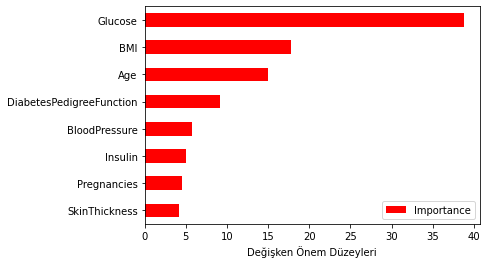

In [127]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")